In [22]:
import pandas as pd # importing libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from matplotlib import pyplot as plt
%matplotlib inline

In [23]:
fuel=pd.read_csv("D:\\Sem 4\\ML\\week4\\Fuel.csv")
fuel.head()


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [24]:
fuel = fuel[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]

In [25]:
fuel.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


In [26]:
x1 = fuel.loc[:, fuel.columns != 'CO2EMISSIONS']
y1 = fuel[["CO2EMISSIONS"]]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.3)

In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
 
model.fit(x_train, y_train)
y_pred1 = model.predict(x_test)

In [39]:
from sklearn.preprocessing import PolynomialFeatures
S
acc = []
train_acc = []
degree = []
mse = []
rss = []
for i in range(2,6):
    poly = PolynomialFeatures(degree = i)
    X_poly = poly.fit_transform(x_train)

    poly.fit(X_poly, y_train)
    model1 = LinearRegression()
    model1.fit(X_poly, y_train)

    y_pred = model1.predict(poly.fit_transform(x_test))
    train_error = model1.predict(poly.fit_transform(x_train))
    r2 = r2_score(y_test, y_pred)
    
    acc.append(r2*100)
    te = r2_score(y_train, train_error)
    train_acc.append(te*100)
    degree.append(i)
    MSE = np.square(np.subtract(y_test,y_pred)).mean()
    RSS = np.square(np.subtract(y_test,y_pred)).sum()
    mse.append(MSE)
    rss.append(RSS)

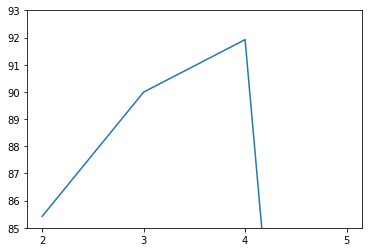

In [32]:
plt.ylim(85,93)
plt.xticks([2,3,4,5,6])
plt.plot(degree,acc)
plt.show()

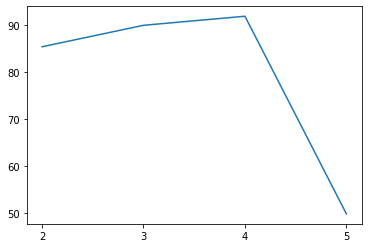

In [35]:

plt.xticks([2,3,4,5,6])
plt.plot(degree,acc)
plt.show()

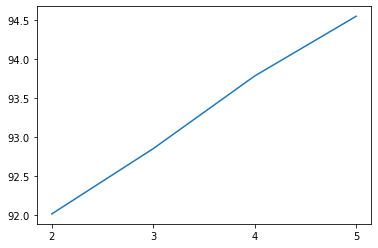

In [40]:
plt.xticks([2,3,4,5,6])
plt.plot(degree,train_acc)
plt.show()

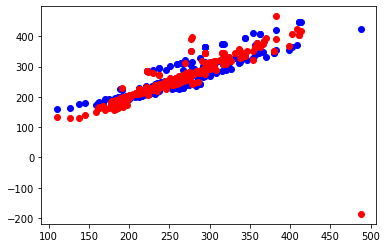

In [33]:
plt.scatter(y_test, y_pred1, color = 'blue')
plt.scatter(y_test, y_pred, color = 'red')
plt.show()

In [34]:
print(acc)

[85.42086902149778, 89.99229681136023, 91.92336668515816, 49.794175978238144]


In [41]:
print(train_acc)

[92.01263213388422, 92.85219463005753, 93.78660263236802, 94.55452343445297]
